Regression Summary for Prior to June 1st, 2021:
                              OLS Regression Results                             
Dep. Variable:     total_deaths_per_100k   R-squared:                       0.687
Model:                               OLS   Adj. R-squared:                  0.684
Method:                    Least Squares   F-statistic:                     245.8
Date:                   Mon, 10 Jun 2024   Prob (F-statistic):           5.13e-30
Time:                           01:59:09   Log-Likelihood:                 252.89
No. Observations:                    114   AIC:                            -501.8
Df Residuals:                        112   BIC:                            -496.3
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

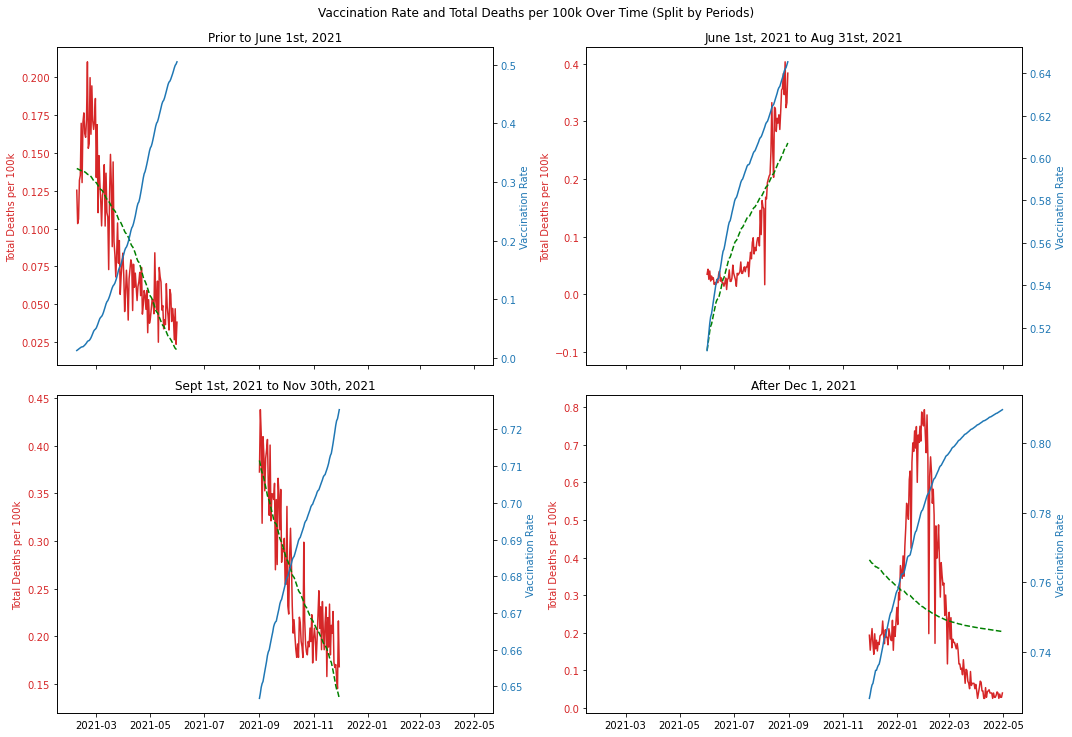

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

data = pd.read_csv('covidcsv.csv')
data['Date'] = pd.to_datetime(data['date'])
data = data.dropna()

# Calculate total population and total deaths
data['total_population'] = data['population_unvaccinated'] + data['population_vaccinated']
data['total_deaths'] = data['unvaccinated_deaths'] + data['vaccinated_deaths']

# Calculate total deaths per 100,000 population
data['total_deaths_per_100k'] = (data['total_deaths'] / data['total_population']) * 100000

# Calculate the vaccination rate
data['vaccination_rate'] = data['population_vaccinated'] / data['total_population']

# Define the time periods
time_periods = [
    ("Prior to June 1st, 2021", data[data['Date'] < '2021-06-01']),
    ("June 1st, 2021 to Aug 31st, 2021", data[(data['Date'] >= '2021-06-01') & (data['Date'] <= '2021-08-31')]),
    ("Sept 1st, 2021 to Nov 30th, 2021", data[(data['Date'] >= '2021-09-01') & (data['Date'] <= '2021-11-30')]),
    ("After Dec 1, 2021", data[(data['Date'] >= '2021-12-01') & (data['Date'] <= '2022-04-30')])
]

fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
axs = axs.flatten()

for ax, (title, subset) in zip(axs, time_periods):
    ax.plot(subset['Date'], subset['total_deaths_per_100k'], color='tab:red', label='Total Deaths per 100k')
    ax2 = ax.twinx()
    ax2.plot(subset['Date'], subset['vaccination_rate'], color='tab:blue', label='Vaccination Rate')


    X = subset['vaccination_rate']
    Y = subset['total_deaths_per_100k']
    X = sm.add_constant(X) 
    model = sm.OLS(Y, X).fit()
    predictions = model.predict(X)

    # Plot regression line
    ax.plot(subset['Date'], predictions, color='green', linestyle='--', label='Regression Line')

    print(f"Regression Summary for {title}:")
    print(model.summary())

    ax.set_title(title)
    ax.set_ylabel('Total Deaths per 100k', color='tab:red')
    ax2.set_ylabel('Vaccination Rate', color='tab:blue')
    ax.tick_params(axis='y', labelcolor='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()
plt.suptitle('Vaccination Rate and Total Deaths per 100k Over Time (Split by Periods)', y=1.02)
plt.show()

